In [0]:
import os
os.environ['KAGGLE_USERNAME'] = "selvam02cs33" # username from the json file 
os.environ['KAGGLE_KEY'] = "97c899f6eebbb72a4403830938dda036" # key from the json file
!kaggle competitions download -c ieee-fraud-detection # api copied from kaggle

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing # encoding 
from sklearn.linear_model import LogisticRegression # regression model
from sklearn.pipeline import Pipeline # transforms with a final estimator
from sklearn.preprocessing import Imputer # imputing the missing values
import matplotlib.pyplot as plt # Visualization graph
import seaborn as sns # data visualization
sns.set()

Import the **training data**

In [0]:
data_tr_i = pd.read_csv('train_identity.csv.zip', low_memory= True)
data_tr_t = pd.read_csv('train_transaction.csv.zip', low_memory= True)

Filter the data column which got Nan value less than 80 % and merge the two dataframe

In [0]:
data_train_trans_filtered = data_tr_t.loc[:, data_tr_t.isnull().mean() < .8]
data_train_ident_filtered = data_tr_i.loc[:, data_tr_i.isnull().mean() < .8]

df_train = data_train_trans_filtered.merge(data_train_ident_filtered, on='TransactionID', how='left')


Import the **test data**

In [0]:
data_te_i = pd.read_csv('test_identity.csv.zip', low_memory= True)
data_te_t = pd.read_csv('test_transaction.csv.zip', low_memory= True)

Filter the data column which got Nan value less than 80 % and merge the two dataframe

In [0]:
data_test_trans_filtered = data_te_t.loc[:, data_te_t.isnull().mean() < .8]
data_test_ident_filtered = data_te_i.loc[:, data_te_i.isnull().mean() < .8]

df_test = data_test_trans_filtered.merge(data_test_ident_filtered, on='TransactionID', how='left')


After filtering out the train and test data, checking which are columns are available in test data

In [0]:
print(df_test.columns.difference(df_train.columns))
print(df_train.columns.difference(df_test.columns))


df_train.shape, df_test.shape

Index(['D13', 'D14', 'D6'], dtype='object')
Index(['isFraud'], dtype='object')


((590540, 370), (506691, 372))

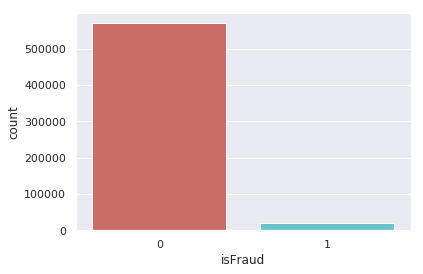

In [0]:
sns.countplot(x='isFraud',data=df_train, palette='hls')
plt.show()

Dropping the Columns which is not needed

In [0]:
X_train = df_train.drop(columns=['TransactionID', 'TransactionDT', 'isFraud'])
X_test = df_test.drop(columns=['TransactionID', 'TransactionDT', 'D13','D14','D6'])
y_train = df_train['isFraud']

Encoding the train and test data

In [0]:
def lable_encode(dataset):
  for col in dataset.columns:
    if dataset[col].dtype=='object':
      print('lable encoding', col)
      lbl = preprocessing.LabelEncoder()
      lbl.fit(list(dataset[col].values))
      dataset[col]= lbl.transform(list(dataset[col].values))
  return

In [0]:
lable_encode(X_train)

lable encoding ProductCD
lable encoding card4
lable encoding card6
lable encoding P_emaildomain
lable encoding R_emaildomain
lable encoding M1
lable encoding M2
lable encoding M3
lable encoding M4
lable encoding M5
lable encoding M6
lable encoding M7
lable encoding M8
lable encoding M9
lable encoding id_12
lable encoding id_15
lable encoding id_16
lable encoding id_28
lable encoding id_29
lable encoding id_30
lable encoding id_31
lable encoding id_33
lable encoding id_34
lable encoding id_35
lable encoding id_36
lable encoding id_37
lable encoding id_38
lable encoding DeviceType
lable encoding DeviceInfo


In [0]:
lable_encode(X_test)

lable encoding ProductCD
lable encoding card4
lable encoding card6
lable encoding P_emaildomain
lable encoding R_emaildomain
lable encoding M1
lable encoding M2
lable encoding M3
lable encoding M4
lable encoding M5
lable encoding M6
lable encoding M7
lable encoding M8
lable encoding M9
lable encoding id_12
lable encoding id_15
lable encoding id_16
lable encoding id_28
lable encoding id_29
lable encoding id_30
lable encoding id_31
lable encoding id_33
lable encoding id_34
lable encoding id_35
lable encoding id_36
lable encoding id_37
lable encoding id_38
lable encoding DeviceType
lable encoding DeviceInfo


In [0]:
print(X_test.columns.difference(X_train.columns))

X_test.shape, X_train.shape

Index([], dtype='object')


((506691, 367), (590540, 367))

**Using Logistic model**

In [0]:
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
logreg = LogisticRegression(class_weight='balanced')
steps = [('imputation', imp),('logistic_regression', logreg)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

**Model Prediction**

In [0]:
y_pred = pipeline.predict(X_test)
pipeline.score(X_train, y_train)

0.7768381481356047

**Submit data**

In [0]:
submit = pd.read_csv('sample_submission.csv.zip')
submit['isFraud'] = y_pred
submit.to_csv('submission.csv', index=False)
submit.head()

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,0
